# Solving the Harmonic Oscillator using the Shooting Method
### Erik S. Sorensen, Physics & Astronomy, McMaster University,  October 2, 2019
#### Last Edit: Pat Clancy - November 10, 2023

In this notebook we will be solving the **harmonic oscillator** using the shooting method. We shall be looking for solutions to the **stationary** Schr&ouml;dinger equation. We shall again exploit the crucial fact that the potential is *symmetric*. However, since the potential is finite for all $x$ we expect there to be significant leakage outside the classically allowed region. To deal with this we will have to use the same approach as we did for the Finite Well.  As usual, we shall take $\hbar=m=1$. Let's begin by importing the things we need and defining the potential. Fill in the expression for the potential below:

In [1]:
from pylab import *
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import numpy as np
 
def V(x):
    global omega 
    return 1/2 * (x**2) * (omega**2)  # because m = 1

The method we shall be using requires a function that returns an array with 2 values D1 and D2 that are the first and second derivatives at that value of x: $\psi'(x)$, $\psi''(x)$. As input it takes another array which is $\psi(x)$ and $\psi'(x)$. You may be wondering why we need to do that. This comes about quite naturally if you write a second order differential equation as 2 **first** order coupled differential equations. This is precisely the same thing we did for the Finite and Infinite Well. The function assumes a value of $E$ is defined elsewhere and it looks as follows:

In [104]:
def D1D2(psi, x):
    D1 = psi[1]
    D2 = 2.0*(V(x) - E)*psi[0]
    return array([D1, D2])

We use the same method for integrating as we did for the Finite Well. That is, we need a function that can integrate $\psi(x)$ and $\psi'(x)$ as 2 first order equations given some initial guess at a left-most point $x_{left}$. The routine will integrate from the left to the right-most end point $x_{right}$.  Python has utilities for doing this and the one we shall be using is called odeint from a module called scipy. We set it up so that when given a value of $E$ the function returns a single value, $\psi(x_{right})$, where $x_{right}$ is the right-most end point of the integration. Later we shall specify what $x_{right}$ is. The python way of getting the right-most value of an [N,2] array is psi[-1,0], where the negative value means counting from the end. As mentioned, psi[:,0] contains the values of $\psi(x)$ and psi[:,1] contains the values of $\psi'(x)$.

This is identical to what we did for the Finite Well, and we will employ a similar normalization here.

In [132]:
def Wave_function(energy):
    global psi
    global E
    E = energy                #We need this so as to pass it to DD
    psi = odeint(D1D2, psi0, x)
    psi = psi/sqrt(h*2.*np.sum(np.square(psi[:,0])))
    return psi[-1,0]

### The shooting method

As before, we will solve this problem using the shooting method. Initially we focus on odd solutions where $\psi(x=0)=0$. For convenience we integrate from $x=-b=-15$ up to $x=0$. If we consider high lying states and/or a very small $\omega$ then we might have to change this. Here we shall be concerned with $\omega=1,2$ and energies below $E_{max}=70$ for which $x=-b=-15$ is sufficient.


In [133]:
N = 10000                   # number of discrete points on the x-axis
omega = 2                   # set omega
b = 15                     # Set the starting point outside the well for integrating
h = b/(N-1)                 # Set the spacing between points on the x-axis
E = 0                       # initialize the global variable E
psi = np.zeros([N,2])       # Wave function values and its derivative (psi and psi')
x = linspace(-b, 0, N)      # the points on the x-axis between left wall of the well and x=0
Emax = 70.0 
Ebottom = 0.0                # let us only look for solutions between Ebottom and Emax
en = linspace(Ebottom, Emax, 1000) # A number of discrete energies where we will calculate psi(x=0)
psi_b = []                  # vector of wave function at x = 0 for all of the energies in en
for e1 in en:
    psi0 = array([0,0.000001])
    psi_b.append(Wave_function(e1))     # Determine psi(x=0) for every e1 in en

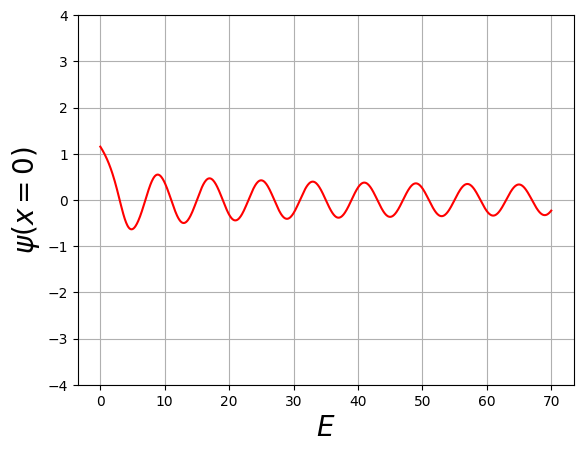

In [134]:
plt.plot(en, psi_b, 'r-')
plt.xlabel(r'$E$',size=20)
plt.ylabel(r'$\psi(x=0)$',size=20)
plt.grid(True)
plt.ylim(-4,4)
plt.show()

### Finding precise solutions

It is a bit hard to read off the exact values of the zeroes on the figure above, so we are going to use the python routine brentq to find them more precisely. The routine locates two subsequent values in the array psi_b where there is a sign change and then uses extrapolation techniques to find more precise values for the value of E that gives us $\psi(x=0)=0$. This is unchanged from what we did for the Infinite and Finite Well.

In [135]:
def find_all_zeroes(x,y):
    all_zeroes = []
    s = sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(Wave_function, x[i], x[i+1])
            all_zeroes.append(zero)
    return all_zeroes

We can now determine all the zeroes in the range up to $E_{max}$ and print them out

In [136]:
E_zeroes = find_all_zeroes(en, psi_b)   # now find the precise energies where psi(x=0) = 0 
print( "Energies for the bound states are: ")
for E in E_zeroes:
        print( '%11.7f' % E)

Energies for the bound states are: 
  3.0000000
  7.0000000
 11.0000000
 15.0000000
 19.0000000
 23.0000001
 27.0000000
 31.0000001
 35.0000001
 39.0000001
 43.0000001
 47.0000001
 51.0000002
 55.0000002
 59.0000002
 63.0000001
 67.0000002


### Question 1

We start by setting $\omega=1$. Do the energies you determine correspond to what you expect for odd solutions? What about for $\omega=2$? Verify the even solutions as well, you only need a few examples here. Recall that you can get even solutions by changing the array value which *Wave_function* returns.

We use the same method to plot the wavefunctions as we did for the Finite Well. However, here we will focus on the 17th odd state with $\omega=2$.

With the precise energy values determined we can look at the wavefunctions. Since in this case we want the wavefunction not only in the well but also outside of it, we set the x-axis to be from -b to 0. You might ask why we don't set it to go from -b to b. The problem with that is that it won't really work when $x>a$ because routines like *odeint* struggle to work if we choose a direction where the solution we're looking for is **exponentially decreasing**. At some point *odeint* will instead start to pick up the solutions to Schr&ouml;dinger's equation that are **exponentially increasing**. Mathematically that is a solution to the differential equation as well but it is unphysical so we throw it away. Unfortunately, the computer does not know about that. On the other hand this is pretty easy to fix since we know that the solutions are either even or odd. So, we can simply copy the solution we have for $x<0$, reverse it, and use it for $x>0$. That explains the extra lines with *psil*, *psir* and *psilr*. Reversing the elements in an array is easy to do by using *psil[N-1,0,-1]*, where we skip the last element of *psil* since that corresponds to $x=0$. Also note that when we look at the odd solutions we have to put in a minus sign when we copy over *psil* to form *psir*. The final result is *psilr* which goes all the way from -b to b.

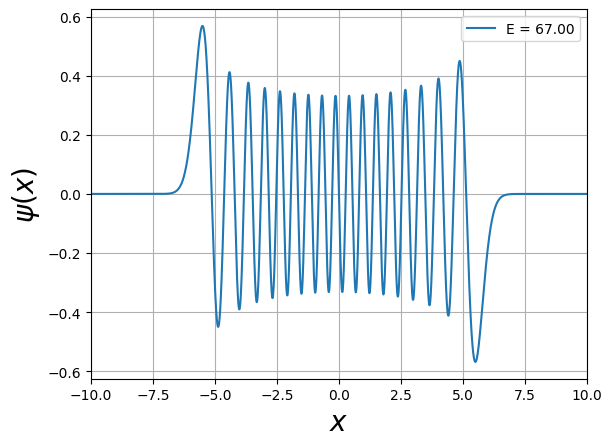

In [140]:
x = linspace(-b, 0, N)
xall =linspace(-b,b,2*N-1)
h=b/(N-1)
for E in E_zeroes[16:17]:
        Wave_function(E)
        psil = psi[:,0]
        psir = -psil[N-1:0:-1]
        psilr = np.append(psil,psir)
        psilr=psilr/sqrt(h*np.sum(np.square(psilr)))
        plt.plot(xall, psilr, label="E = %.2f"%E)
        
#psi1exact = xall*np.exp(-omega*xall*xall/2)*sqrt(2*omega)*sqrt(sqrt(omega/math.pi))
#plt.plot(xall, psi1exact, 'r',label="Exact")      
plt.xlabel(r'$x$',size=20)
plt.ylabel(r'$\psi(x)$',size=20)
plt.legend()
plt.xlim(-10,10)
plt.grid(True)
plt.show()

### Question 2

Consider the 17th odd state with $\omega=2$. How many nodes (zeroes) does the wavefunction have? Explain your finding.

### Question 3

Now let us study the 17th odd state with $\omega=2$ in a bit more detail. As before, we might expect significant 'leaking' of the wavefunction outside the well. However, in the case of the SHO it is not as clear what 'outside the well' means. We determine this by using the classical turning point where $E=V(x)$. Find the classical turning point for the 17th odd state with $\omega=2$. What is the probability of finding the particle outside the well?

(Hint: the 17th Energy value can be found in the array E_zeroes. Also, remember that python starts indexing from 0 not 1)

In [116]:
xturn = np.sqrt(2*67)/omega
print('Classical turning point:  %11.7f' % xturn)
psioutside=np.where(abs(xall)>xturn,psilr,0)

sum = 0
for x in psioutside: sum = sum + (x**2) * h
proba = sum

print('Probability outside well: %11.7f' % proba)

Classical turning point:    5.7879185
Probability outside well:   0.0413093
